# Importing The Dependenices


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data Collection & Processing


In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")


In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(f"Train_df: {train_df.shape}")
print(f"Test_df: {test_df.shape}")

Train_df: (1460, 81)
Test_df: (1459, 80)


# Data Cleaning and Preprocessing

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Chack the Missing values

In [8]:
for col in train_df:
    print(col,train_df[col].isnull().sum())
   

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrS

In [9]:
for col in test_df:
    print(col,train_df[col].isnull().sum()) 

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 872
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrS

> Handling Missing Values: Missing values are handled differently for numerical and categorical columns:

> Numerical columns are imputed using the median, which is less affected by outliers than the mean.

> Categorical columns are imputed using the most frequent category to maintain consistency in categorical data

In [10]:
# Select numerical and categorical columns
numerical_cols_train = train_df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols_train = train_df.select_dtypes(include=["object"]).columns

numerical_cols_test = test_df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols_test = test_df.select_dtypes(include=["object"]).columns

# Impute numerical columns in the training set with median strategy
imputer_median_train = SimpleImputer(strategy="median")
train_df[numerical_cols_train] = imputer_median_train.fit_transform(train_df[numerical_cols_train])

# Impute numerical columns in the test set with median strategy
imputer_median_test = SimpleImputer(strategy="median")
test_df[numerical_cols_test] = imputer_median_test.fit_transform(test_df[numerical_cols_test])

# Impute categorical columns in the training set with most frequent strategy
imputer_most_train = SimpleImputer(strategy="most_frequent")
train_df[categorical_cols_train] = imputer_most_train.fit_transform(train_df[categorical_cols_train])

# Impute categorical columns in the test set with most frequent strategy
imputer_most_test = SimpleImputer(strategy="most_frequent")
test_df[categorical_cols_test] = imputer_most_test.fit_transform(test_df[categorical_cols_test])





# NO Missing Values

In [11]:

print("Train_df No missing values: \n", train_df.isnull().sum())

print("////////////////////////")

print("Test_df No missing values: \n",test_df.isnull().sum())

Train_df No missing values: 
 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64
////////////////////////
Test_df No missing values: 
 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64


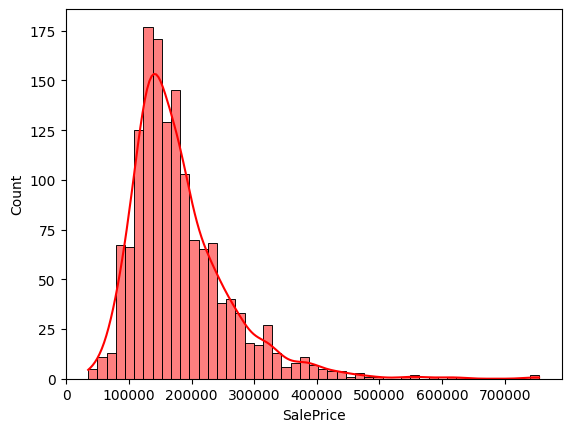

In [12]:
sns.histplot(x="SalePrice",kde=True,color = "r",data = train_df)
plt.show()

In [13]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

 # Dropping Irrelevant Columns:
> Columns like Alley, PoolQC, Fence, and MiscFeature are dropped from both datasets, as these might have too many missing values or be irrelevant for house price prediction

In [14]:
train_df.drop(columns=["Alley","PoolQC","Fence","MiscFeature"],inplace = True)
test_df.drop(columns=["Alley","PoolQC","Fence","MiscFeature"],inplace = True)

# Label Encoding Categorical Columns:
Label encoding is applied to categorical columns to convert string-based data into numeric format, making it compatible with machine learning models. Here, each unique category is converted to a unique integer. This encoding is applied separately to the training and test datasets to avoid data leakage.

In [15]:
for i in train_df.select_dtypes(include="object").columns:
    label_en = LabelEncoder()
    train_df[i] = label_en.fit_transform(train_df[i])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.linear_model import LinearRegression,Lasso, Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Splitting Data for Training and Testing:
 > The data is split into training and testing sets using an 80-20 split. SalePrice is defined as the target variable (y), and the remaining features make up the predictor variables (X). This ensures that the model is trained on a subset of data and tested on unseen data to evaluate its performance.

# Model Training:
> A RandomForestRegressor model is instantiated and trained on the x_train and y_train datasets. This model is well-suited for structured data and can capture complex relationships without requiring feature scaling


In [17]:
# Define features and target
X = train_df.drop(columns=['SalePrice'])
y = train_df['SalePrice']

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=15)

# Train the model
random = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
random.fit(x_train, y_train)

# Evaluate the model
train_score = random.score(x_train, y_train) * 100
test_score = random.score(x_test, y_test) * 100
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

# Predictions and save to CSV
test_preds = random.predict(x_test)
output = pd.DataFrame({'Id': x_test.index, 'SalePrice': test_preds})
output.to_csv('submission_1.csv', index=False)
print("Predictions saved to submission.csv")


Train Score: 97.33538977061414
Test Score: 89.28353357901564
Predictions saved to submission.csv


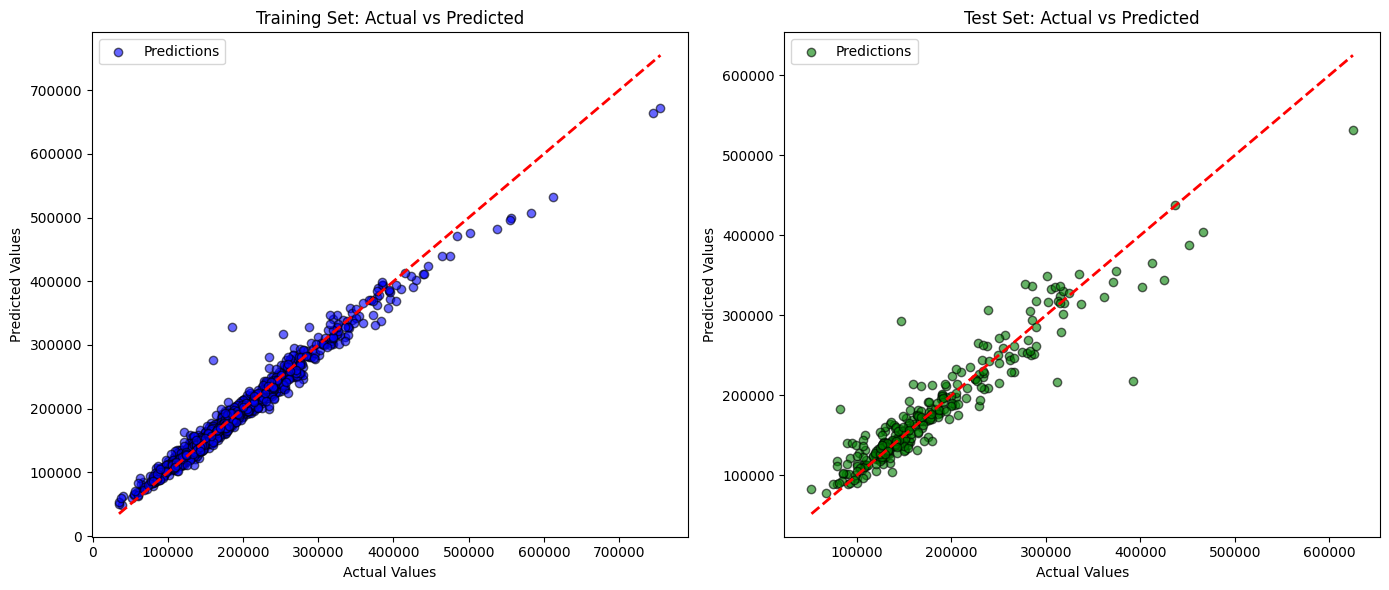

In [18]:

# Predicting values for train and test sets
y_train_pred = random.predict(x_train)
y_test_pred = random.predict(x_test)

# Plotting the results
plt.figure(figsize=(14, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color="blue", edgecolor="k", alpha=0.6, label="Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Training Set: Actual vs Predicted")
plt.legend()

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color="green", edgecolor="k", alpha=0.6, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Test Set: Actual vs Predicted")
plt.legend()

plt.tight_layout()
plt.show()
